# Dataset

In [1]:
import sys

# add the parent directory to the path so we can import the module
sys.path.append("/data2/eranario/scratch/strawberry-yield-forecasting")

In [2]:
import torch
from src.dataset import StrawberryDataset

In [3]:
# create random seed
torch.manual_seed(456)

In [4]:
# device is cuda else cpu
device = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:
path_to_counts = "/data2/eranario/data/Strawberry-Yield-Forecasting/2022_stitched/"
path_to_weights = "/data2/eranario/data/Strawberry-Yield-Forecasting/weights/weights.csv"
n_seq = 5
seq_l = 3
n_folds = 2
k_fold = 2
use_weights = False
skip = [] # skip must be a list
time_int = False
dataset = StrawberryDataset(path_to_counts, path_to_weights, k_fold=k_fold,
                            n_seq=n_seq, seq_l=seq_l, n_folds=n_folds, use_weights=use_weights, 
                            skip=skip, time_int=time_int)

In [6]:
# Check date parsing
months, days, years = dataset.months, dataset.days, dataset.years
print("\nParsed Dates:")
print("Months:", months)
print("Days:", days)
print("Years:", years)


X_data, y_data = dataset.fnX, dataset.fny
print("\nOrganized Data Shapes:")
print("X_data shape:", X_data.shape)  # Expected: (num_samples, num_features)
print("y_data shape:", y_data.shape)  # Expected: (num_samples, num_labels)

# Display sample data from X and y
print("\nSample X_data:", X_data[0][:10])  # Display first 10 features of first sample
print("Sample y_data:", y_data[0])         # Display first sample of y_data

print("\nDataset length (number of samples):", len(dataset))

X_sample, y_sample = dataset[0]
print("\nSample from __getitem__:")
print("X_sample:", X_sample[:10])  # Display first 10 features of X_sample
print("y_sample:", y_sample)


Parsed Dates:
Months: ['06', '06', '07', '07', '07', '07', '07', '07', '08', '08', '08', '08', '08', '09', '09']
Days: ['17', '28', '05', '08', '15', '19', '26', '29', '02', '05', '09', '12', '29', '01', '20']
Years: ['2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022', '2022']

Organized Data Shapes:
X_data shape: (485, 3, 6)
y_data shape: (485, 1)

Sample X_data: [[0.10526316 0.2460815  0.25925926 0.20430108 0.15254237 0.65      ]
 [0.         0.         0.00854701 0.         0.         0.03888889]
 [0.         0.34216867 0.35260116 0.22321429 0.18867925 1.        ]]
Sample y_data: [0.16455696]

Dataset length (number of samples): 485

Sample from __getitem__:
X_sample: tensor([[0.1053, 0.2461, 0.2593, 0.2043, 0.1525, 0.6500],
        [0.0000, 0.0000, 0.0085, 0.0000, 0.0000, 0.0389],
        [0.0000, 0.3422, 0.3526, 0.2232, 0.1887, 1.0000]])
y_sample: tensor([0.1646])


# Dataloader

In [7]:
import torch
from torch.utils.data import DataLoader

In [8]:
train_size = int(0.75 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Create indices
train_indices = list(range(train_size))
val_indices = list(range(train_size, len(dataset)))

# Create subsets
train_dataset = torch.utils.data.Subset(dataset, train_indices)
val_dataset = torch.utils.data.Subset(dataset, val_indices)

train_loader = DataLoader(train_dataset, batch_size=5, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=5, shuffle=False)

In [9]:
len(train_loader), len(val_loader)

(73, 25)

In [10]:
# try to get a batch of data
for i, (X_batch, y_batch) in enumerate(train_loader):
    print("\nBatch", i)
    print("X_batch shape:", X_batch.shape)
    print("y_batch shape:", y_batch.shape)
    print("X_batch:", X_batch) # (batch_size, n_seq, num_classes)
    print("y_batch:", y_batch) # (batch_size, 1)
    break


Batch 0
X_batch shape: torch.Size([5, 3, 6])
y_batch shape: torch.Size([5, 1])
X_batch: tensor([[[0.1053, 0.2461, 0.2593, 0.2043, 0.1525, 0.6500],
         [0.0000, 0.0000, 0.0085, 0.0000, 0.0000, 0.0389],
         [0.0000, 0.3422, 0.3526, 0.2232, 0.1887, 1.0000]],

        [[0.0000, 0.0000, 0.0085, 0.0000, 0.0000, 0.0389],
         [0.0000, 0.3422, 0.3526, 0.2232, 0.1887, 1.0000],
         [0.1250, 0.0629, 0.1389, 0.0222, 0.0000, 0.1778]],

        [[0.0000, 0.3422, 0.3526, 0.2232, 0.1887, 1.0000],
         [0.1250, 0.0629, 0.1389, 0.0222, 0.0000, 0.1778],
         [0.0556, 0.1426, 0.0851, 0.1316, 0.0741, 0.1222]],

        [[0.1250, 0.0629, 0.1389, 0.0222, 0.0000, 0.1778],
         [0.0556, 0.1426, 0.0851, 0.1316, 0.0741, 0.1222],
         [0.0563, 0.0870, 0.0729, 0.1163, 0.1786, 0.1333]],

        [[0.0556, 0.1426, 0.0851, 0.1316, 0.0741, 0.1222],
         [0.0563, 0.0870, 0.0729, 0.1163, 0.1786, 0.1333],
         [0.1209, 0.2101, 0.2837, 0.1485, 0.1290, 0.5889]]])
y_batch: tensor(

# Training

In [11]:
import torch
import matplotlib.pyplot as plt

from torch.nn import MSELoss
from torch.optim import Adam
from torch import nn
from src.model import TransformerEncoderTransformerMasked

In [12]:
def train_transformer_decoder(model, train_loader, val_loader, epochs, lr):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    criterion = MSELoss()
    optimizer = Adam(model.parameters(), lr=lr)

    best_val_loss = float("inf")
    best_model = None

    train_losses = []  # To store train loss for each epoch
    val_losses = []    # To store validation loss for each epoch

    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)  # Append to train losses

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()

        val_loss /= len(val_loader)
        val_losses.append(val_loss)  # Append to validation losses

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        # Save best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = model.state_dict()

    # Load best model before returning
    model.load_state_dict(best_model)

    # Plot training and validation loss curves
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, epochs + 1), train_losses, label="Train Loss")
    plt.plot(range(1, epochs + 1), val_losses, label="Validation Loss", linestyle="--")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Train vs Validation Loss Curve")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return model

In [13]:
def init_weights(m):
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        nn.init.kaiming_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)
    elif isinstance(m, nn.LSTM):
        for param in m.parameters():
            if param.dim() > 1:
                nn.init.kaiming_uniform_(param)

In [ ]:
input_dim = (dataset.samples_dim[2]+1) if time_int else dataset.samples_dim[2]
seq_len = dataset.seq_l
epochs = 50
learning_rate = 0.0001

model = TransformerEncoderTransformerMasked(input_dim=input_dim, transformer_hidden_size=32, num_encoder_layers=2, num_transformer_layers=2, num_heads=2, dropout=0.5, use_time_emb=True)
model.apply(init_weights)

TransformerEncoderTransformerMasked(
  (input_projection): Linear(in_features=6, out_features=64, bias=True)
  (pos_emb): Embedding(10, 64)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=2048, bias=True)
        (dropout): Dropout(p=0.5, inplace=False)
        (linear2): Linear(in_features=2048, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.5, inplace=False)
        (dropout2): Dropout(p=0.5, inplace=False)
      )
    )
  )
  (time_emb): Sequential(
    (0): Linear(in_features=1, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=6

Epoch 1/50, Train Loss: 3.1243, Val Loss: 0.0497
Epoch 2/50, Train Loss: 1.4528, Val Loss: 0.1269
Epoch 3/50, Train Loss: 0.8797, Val Loss: 0.7783
Epoch 4/50, Train Loss: 0.6770, Val Loss: 0.0550
Epoch 5/50, Train Loss: 0.5489, Val Loss: 0.2379
Epoch 6/50, Train Loss: 0.5412, Val Loss: 0.1164
Epoch 7/50, Train Loss: 0.4030, Val Loss: 0.0703
Epoch 8/50, Train Loss: 0.3683, Val Loss: 0.0599
Epoch 9/50, Train Loss: 0.3478, Val Loss: 0.0665
Epoch 10/50, Train Loss: 0.3124, Val Loss: 0.0995
Epoch 11/50, Train Loss: 0.2663, Val Loss: 0.1593
Epoch 12/50, Train Loss: 0.2586, Val Loss: 0.1901
Epoch 13/50, Train Loss: 0.2383, Val Loss: 0.0841
Epoch 14/50, Train Loss: 0.2120, Val Loss: 0.0789
Epoch 15/50, Train Loss: 0.1823, Val Loss: 0.1465
Epoch 16/50, Train Loss: 0.1820, Val Loss: 0.0725
Epoch 17/50, Train Loss: 0.1531, Val Loss: 0.1036
Epoch 18/50, Train Loss: 0.1676, Val Loss: 0.0775
Epoch 19/50, Train Loss: 0.1432, Val Loss: 0.0967
Epoch 20/50, Train Loss: 0.1540, Val Loss: 0.1541
Epoch 21/

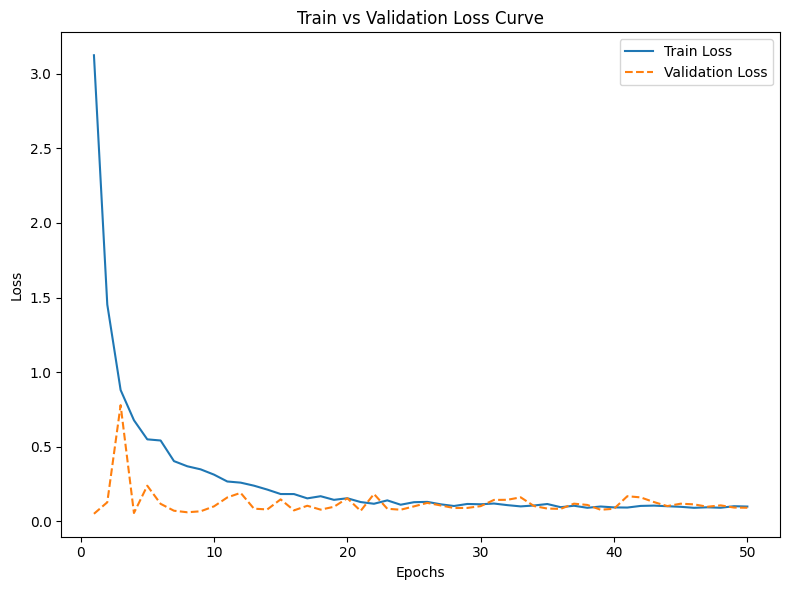

In [15]:
trained_model = train_transformer_decoder(model, train_loader, val_loader, epochs, learning_rate)

# Test

In [16]:
import numpy as np

In [17]:
def evaluate_test_set(model, test_loader, device):
    model.eval()  # Set model to evaluation mode
    predictions = []
    true_values = []
    
    with torch.no_grad():  # Disable gradient computation for inference
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            predictions.append(outputs.cpu().numpy())  # Store predictions
            true_values.append(y_batch.cpu().numpy())  # Store true labels
    
    # Concatenate the results into single arrays
    predictions = np.concatenate(predictions)
    true_values = np.concatenate(true_values)
    
    return predictions, true_values


In [18]:
dataset.mode = 'test'

test_loader = DataLoader(dataset, batch_size=1, shuffle=False)

# check first batch
X_batch, y_batch = next(iter(test_loader))
print("\nSample from test_loader:")
print("X_batch shape:", X_batch.shape)
print("y_batch shape:", y_batch.shape)
print("X_batch:", X_batch)


Sample from test_loader:
X_batch shape: torch.Size([1, 3, 6])
y_batch shape: torch.Size([1, 1])
X_batch: tensor([[[0.1209, 0.2101, 0.2837, 0.1485, 0.1290, 0.5889],
         [0.0943, 0.1269, 0.1087, 0.0968, 0.1200, 0.1889],
         [0.0933, 0.1764, 0.2051, 0.1364, 0.1081, 0.3444]]])


In [19]:
predictions, true_values = evaluate_test_set(trained_model, test_loader, device)

R^2: 0.7510 RMSE: 0.2931


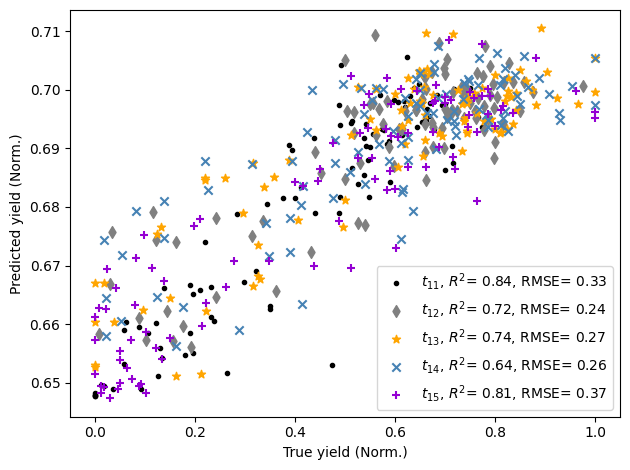

In [20]:
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress

# change true and predicted from (495, 1) to (5. 99)
true_values_reshaped = true_values.reshape(n_seq, -1)
predictions_reshaped = predictions.reshape(n_seq, -1)

scatter_marker = ['.','d','*','x','+','o','.','x','d','*']
scatter_color = ['black','gray','orange','steelblue','darkviolet','blue','pink','blue','pink','coral']

time_folds = [[4, 5, 6, 7, 8], [11, 12, 13, 14, 15]]

plt.figure()
r2_list = []
rmse_list = []

for time in range(n_seq):
    slope, intercept, r_value, p_value, std_err = linregress(true_values_reshaped[time, :], predictions_reshaped[time, :])
    r2 = r_value ** 2
    rmse = np.sqrt(mean_squared_error(true_values_reshaped[time], predictions_reshaped[time]))
    
    label = str(time_folds[k_fold-1][time])
    plt.scatter(true_values_reshaped[time, :], predictions_reshaped[time, :], marker = scatter_marker[time], color=scatter_color[time], label = f'$t_{{{label}}}$, $R^2$= {r2:.2f}, RMSE= {rmse:.2f}')
    r2_list.append(r2)
    rmse_list.append(rmse)

print(f"R^2: {np.mean(r2_list):.4f}", f"RMSE: {np.mean(rmse_list):.4f}")
plt.xlabel('True yield (Norm.)')
plt.ylabel('Predicted yield (Norm.)')
plt.legend()
plt.tight_layout()
plt.show()

R^2: 0.7510 RMSE: 69.4644


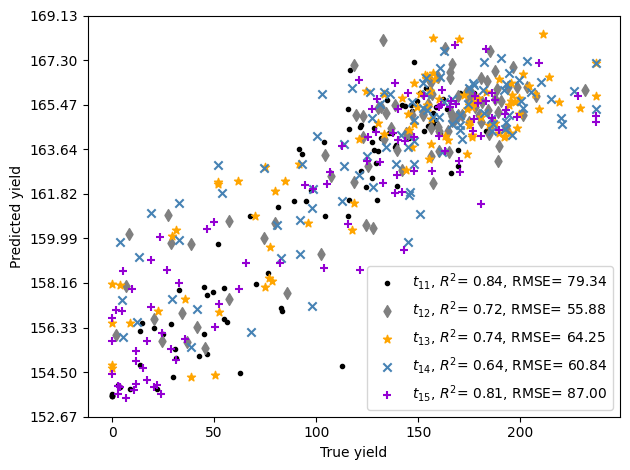

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import linregress

# Access the scaler
y_scaler = dataset.y_scaler

# Determine the number of expected features
expected_features = y_scaler.min_.shape[0]

# Pad true values and predictions
true_values_padded = np.zeros((true_values.shape[0], expected_features))
predictions_padded = np.zeros((predictions.shape[0], expected_features))

# Assign the actual values to the appropriate column (e.g., first column)
true_values_padded[:, 0] = true_values.flatten()
predictions_padded[:, 0] = predictions.flatten()

# Unnormalize and extract the relevant column
true_values_unnormalized = y_scaler.inverse_transform(true_values_padded)[:, 0]
predictions_unnormalized = y_scaler.inverse_transform(predictions_padded)[:, 0]

# Reshape for evaluation
true_values_reshaped_final = true_values_unnormalized.reshape(n_seq, -1)
predictions_reshaped_final = predictions_unnormalized.reshape(n_seq, -1)

scatter_marker = ['.','d','*','x','+','o','.','x','d','*']
scatter_color = ['black','gray','orange','steelblue','darkviolet','blue','pink','blue','pink','coral']

time_folds = [[4, 5, 6, 7, 8], [11, 12, 13, 14, 15]]

plt.figure()
r2_list = []
rmse_list = []

for time in range(n_seq):
    slope, intercept, r_value, p_value, std_err = linregress(
        true_values_reshaped_final[time, :], predictions_reshaped_final[time, :]
    )
    r2 = r_value ** 2
    rmse = np.sqrt(mean_squared_error(
        true_values_reshaped_final[time], predictions_reshaped_final[time]
    ))

    label = str(time_folds[k_fold-1][time])
    plt.scatter(
        true_values_reshaped_final[time, :], predictions_reshaped_final[time, :],
        marker=scatter_marker[time], color=scatter_color[time],
        label=f'$t_{{{label}}}$, $R^2$= {r2:.2f}, RMSE= {rmse:.2f}'
    )
    r2_list.append(r2)
    rmse_list.append(rmse)

print(f"R^2: {np.mean(r2_list):.4f}", f"RMSE: {np.mean(rmse_list):.4f}")
plt.xlabel('True yield')
plt.ylabel('Predicted yield')

# Set more vertical ticks and ensure 0 is included
y_min, y_max = plt.ylim()
ticks = np.linspace(y_min, y_max, num=10)
# if 0 not in ticks:
#     ticks = np.append(ticks, 0)
#     ticks = np.sort(ticks)
plt.yticks(ticks)

plt.legend()
plt.tight_layout()
plt.show()